## Human Resources & Diversity
##### Sprint 2, Sarrah Abdulali, 3/15/2024

#### Why this data, and data provenance

In my summer consulting internship at Kearney, I was put on the diversity, equity, and inclusion team (which consisted of just me and one manager). In my role as Business Analyst Intern, I was in charge of helping track key statistics such as attrition, utilization, new hires and current headcount, all while keeping in mind diversity goals for the year. I enjoyed creating a PowerBI dashboard where there could be filters for demographics within the firm in real-time, and so I wanted to bring that experience into this project because I enjoyed this topic of data analysis since it is as connected to the real-world as possible. This context is critical as it frames the dataset's relevance to real-world organizational studies on diversity and inclusion, making it a valuable resource for understanding and promoting equitable workplace practices.

 This dataset from [Kaggle](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set/data) is rich in variables and observations, and allows for analysis on many different facets of Human Resources (HR) work. Variables such as age, gender, marital status, date of hire, whether they are active or terminated, department, position title, pay rate, manager name, and performance score will guide my analysis and decision-making for future visuals.

This dataset was created by Dr. Richard Huebner and Dr. Carla Patalano from the New England College of Business over 10 years ago, and was used for the HR Metrics and Analytics course to teach HR students how to use and analyze the data in Tableau Desktop. It was updated 3 years ago to include more variables such as absences, performance review dates, and employee engagement scores. It is synthetic by nature; data was collected from a series of other databases, including ADP, HRIS, and other sources. They try to maintain and update the dataset yearly.

#### Data Cleaning

In [74]:
# import dependencies
from dash import Dash, dcc, html, Input, Output, callback
import pandas as pd
import plotly.express as px

In [75]:
#read in the dataset and then see first five rows of the dataframe df
df = pd.read_csv("C:/Users/Student/Downloads/HR Diversity Dataset.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [76]:
# display general information about the dataset to identify data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [77]:
# check for missing values
print(df.isnull().sum())

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [78]:
# ManagerID and DateofTermination are the only columns with missing values
# Let's fill these missing values in with 'N/A' for now, DateofTermination is definitely optional attribute that doesn't apply to everyone but not sure about ManagerID just yet

df['ManagerID'] = df['ManagerID'].fillna(0)
df['DateofTermination'] = df['DateofTermination'].fillna('N/A')

In [79]:
# Check for missing values
print(df.isnull().sum())

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [80]:
# Calculate the number of unique values for each column
unique_values = df.nunique()

# Print the number of unique values for each column
print(unique_values)

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              97
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      24
RecruitmentSource               9
PerformanceSco

In [81]:
# HispanicLatino should be 2 since its a yes/no, and manager ID/manager name should be the same numbers since each manager has their own ID

# get the unique values in the 'HispanicLatino' column
unique_val_hispaniclatino = df['HispanicLatino'].unique()

# print the unique values
print(unique_val_hispaniclatino)

['No' 'Yes' 'no' 'yes']


In [82]:
# standardize 'Yes' and 'No' values in the 'HispanicLatino' column
df['HispanicLatino'] = df['HispanicLatino'].str.capitalize()

# verify change by printing the unique values again
print(df['HispanicLatino'].unique())

['No' 'Yes']


In [83]:
# let's take a look at each manager's name and associated ID, and then how many observations there are of them to see the discrepancy

# group the data by 'ManagerName' and 'ManagerID' and count the occurrences
manager_combos = df.groupby(['ManagerName', 'ManagerID']).size().reset_index(name='Count')

# sort result by 'ManagerName' and 'ManagerID' to make it easier to see
manager_combos_sorted = manager_combos.sort_values(by=['ManagerName', 'ManagerID'])

# print sorted combinations
print(manager_combos_sorted)

           ManagerName  ManagerID  Count
0      Alex Sweetwater       10.0      9
1             Amy Dunn       11.0     21
2   Board of Directors        9.0      2
3   Brandon R. LeBlanc        1.0      6
4   Brandon R. LeBlanc        3.0      1
5       Brannon Miller       12.0     22
6     Brian Champaigne       13.0      8
7        David Stanley       14.0     21
8       Debra Houlihan       15.0      3
9         Elijiah Gray       16.0     22
10        Eric Dougall        6.0      4
11          Janet King        2.0     19
12     Jennifer Zamora        5.0      7
13          John Smith       17.0     14
14       Kelley Spirea       18.0     22
15       Ketsia Liebig       19.0     21
16      Kissy Sullivan       20.0     22
17       Lynn Daneault       21.0     13
18      Michael Albert       22.0     21
19      Michael Albert       30.0      1
20        Peter Monroe        7.0     14
21          Simon Roup        4.0     17
22      Webster Butler        0.0      8
23      Webster 

In [84]:
# It looks like three people have multiple Manager IDs:
# Because Brandon R. LeBlanc and Michael Albert have only one value that is different and the ManagerID is not anyone else's I will keep these values.
#       There's no context in the data description but sometimes, a manager might have multiple roles within an organization, leading to different IDs in separate systems.
# It does strike me as odd that Webster Butler has 8 instances of a "0.0" ManagerID; let's replace them with "39.0" ManagerID because these "0.0" are most likely blank cells especially since the data types are float values.

# update 'ManagerID' for Webster Butler from '0.0' to '39.0'
df.loc[(df['ManagerName'] == 'Webster Butler') & (df['ManagerID'] == 0.0), 'ManagerID'] = 39.0

# verify changes
print(df[df['ManagerName'] == 'Webster Butler']['ManagerID'].unique())

[39.]


In [85]:
# group the data by 'ManagerName' and 'ManagerID' and count the occurrences
fixed_manager_combos = df.groupby(['ManagerName', 'ManagerID']).size().reset_index(name='Count')

# sort result by 'ManagerName' and 'ManagerID' to make it easier to see
fixed_manager_combos_sorted = fixed_manager_combos.sort_values(by=['ManagerName', 'ManagerID'])

# print sorted combinations
print(fixed_manager_combos_sorted)

           ManagerName  ManagerID  Count
0      Alex Sweetwater       10.0      9
1             Amy Dunn       11.0     21
2   Board of Directors        9.0      2
3   Brandon R. LeBlanc        1.0      6
4   Brandon R. LeBlanc        3.0      1
5       Brannon Miller       12.0     22
6     Brian Champaigne       13.0      8
7        David Stanley       14.0     21
8       Debra Houlihan       15.0      3
9         Elijiah Gray       16.0     22
10        Eric Dougall        6.0      4
11          Janet King        2.0     19
12     Jennifer Zamora        5.0      7
13          John Smith       17.0     14
14       Kelley Spirea       18.0     22
15       Ketsia Liebig       19.0     21
16      Kissy Sullivan       20.0     22
17       Lynn Daneault       21.0     13
18      Michael Albert       22.0     21
19      Michael Albert       30.0      1
20        Peter Monroe        7.0     14
21          Simon Roup        4.0     17
22      Webster Butler       39.0     21


In [86]:
# convert date columns to datetime
date_columns = ['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors = 'coerce')

# convert HispanicLatino to binary format since it contains only 'Yes'/'No' values
if set(df['HispanicLatino'].unique()) == {'Yes', 'No'}:
    df['HispanicLatino'] = df['HispanicLatino'].map({'Yes': True, 'No': False})

# convert ManagerID to Int64 to support NaN values
df['ManagerID'] = df['ManagerID'].astype('Int64')

# display data types to verify change
print(df.dtypes)


Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                          bool
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

C:\Users\Student\AppData\Local\Temp\ipykernel_21832\385342934.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [87]:
# replace NaT spaces (from converting to datetime) with 'N/A' in 'DateofTermination'
# this is just because N/A indicates "not applicable", since it's an optional attribute
df['DateofTermination'] = df['DateofTermination'].fillna('N/A')

In [88]:
# i would like for names to be formatted First Middle Last just because its more logical

def reformat(name):
    # make sure there's a space after the comma
    name_with_space = name.replace(',', ', ')
    # split the name on the comma and space
    parts = name_with_space.split(', ')
    # check if name actually contains comma, prevent errors
    if len(parts) == 2:
        lastname, firstname = parts
        # reformat to "Firstname Lastname"
        return f"{firstname} {lastname}".replace("  ", " ")  # no double spaces allowed
    else:
        # return name as is if it doesn't fit the expected format
        return name

# apply reformat function to each name in Employee_Name column
df['Employee_Name'] = df['Employee_Name'].apply(reformat)

# display first few rows to verify change
print(df['Employee_Name'].head())

0         Wilson K Adinolfi
1     Karthikeyan  Ait Sidi
2          Sarah Akinkuolie
3              Trina Alagbe
4            Carol Anderson
Name: Employee_Name, dtype: object


In [89]:
# check for missing values
print(df.isnull().sum())

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [90]:
# no missing values! 
# now confirm that N/A is there instead of NaT for blank cells for the 'DateofTermination' column

# print unique values in the 'DateofTermination' column
unique_dates_of_termination = df['DateofTermination'].unique()

print(unique_dates_of_termination)

['N/A' Timestamp('2016-06-16 00:00:00') Timestamp('2012-09-24 00:00:00')
 Timestamp('2016-09-06 00:00:00') Timestamp('2017-01-12 00:00:00')
 Timestamp('2016-09-19 00:00:00') Timestamp('2017-04-06 00:00:00')
 Timestamp('2017-08-04 00:00:00') Timestamp('2015-09-12 00:00:00')
 Timestamp('2014-04-04 00:00:00') Timestamp('2016-02-19 00:00:00')
 Timestamp('2014-08-07 00:00:00') Timestamp('2013-06-15 00:00:00')
 Timestamp('2014-08-02 00:00:00') Timestamp('2015-11-15 00:00:00')
 Timestamp('2013-01-07 00:00:00') Timestamp('2011-09-26 00:00:00')
 Timestamp('2016-09-23 00:00:00') Timestamp('2016-06-08 00:00:00')
 Timestamp('2015-11-04 00:00:00') Timestamp('2017-06-06 00:00:00')
 Timestamp('2018-09-27 00:00:00') Timestamp('2018-02-25 00:00:00')
 Timestamp('2013-06-05 00:00:00') Timestamp('2016-05-17 00:00:00')
 Timestamp('2013-06-24 00:00:00') Timestamp('2013-01-09 00:00:00')
 Timestamp('2018-08-19 00:00:00') Timestamp('2016-11-15 00:00:00')
 Timestamp('2015-09-05 00:00:00') Timestamp('2015-06-25 

In [91]:
# just a final look.
# happy with all column names as they are as concise as possible

df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,Wilson K Adinolfi,10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,Karthikeyan Ait Sidi,10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,Sarah Akinkuolie,10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,Trina Alagbe,10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,Carol Anderson,10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


### Tidy data

The principles of tidy data are as follows:

Each variable forms a column: In a tidy dataset, every column represents a single variable. This means that each piece of information you're tracking (e.g., age, salary, department) should be in its own column.

Each observation forms a row: Every row in a tidy dataset represents a single observation. An observation could be a single person, an event, a time point, etc., depending on the context of the dataset. 

Each type of observational unit forms a table

### My HR dataset already meets the requirements of tidy data because:

Each variable forms a column: My columns represent individual variables such as Employee Name, Employee ID, Marital Status ID, etc., which aligns with the tidy data principle.

Each observation forms a row: Each row in my dataset corresponds to an individual employee's record, which is consistent with tidy data principles.

Each type of observational unit forms a table: The dataset appears to contain a single observational unit (employee data). There aren't additional observational units mixed in (e.g., department details not directly related to individual employee records).

In [92]:
# looking at a list of columns to see what I need/definitely don't need

# print out all column names line by line
column_names = df.columns

for name in column_names:
    print(name)


Employee_Name
EmpID
MarriedID
MaritalStatusID
GenderID
EmpStatusID
DeptID
PerfScoreID
FromDiversityJobFairID
Salary
Termd
PositionID
Position
State
Zip
DOB
Sex
MaritalDesc
CitizenDesc
HispanicLatino
RaceDesc
DateofHire
DateofTermination
TermReason
EmploymentStatus
Department
ManagerName
ManagerID
RecruitmentSource
PerformanceScore
EngagementSurvey
EmpSatisfaction
SpecialProjectsCount
LastPerformanceReview_Date
DaysLateLast30
Absences


In [93]:
# i am keeping the columns with "ID" in them just in case down the line I want to use an employee's ID instead of their name, or if I want to sum 0's and 1's, or for position if I choose to use numbers instead of position name

# columns to drop are those i know i won't need/aren't relevant because they're obsolete or unnecessary to final analysis
drop = ['SpecialProjectsCount', 'DaysLateLast30', 'CitizenDesc', 'State', 'Zip']

# drop specified columns from the DataFrame
df = df.drop(columns=drop)

In [94]:
# print out all column names line by line, just checking it updated
column_names = df.columns

for name in column_names:
    print(name)

Employee_Name
EmpID
MarriedID
MaritalStatusID
GenderID
EmpStatusID
DeptID
PerfScoreID
FromDiversityJobFairID
Salary
Termd
PositionID
Position
DOB
Sex
MaritalDesc
HispanicLatino
RaceDesc
DateofHire
DateofTermination
TermReason
EmploymentStatus
Department
ManagerName
ManagerID
RecruitmentSource
PerformanceScore
EngagementSurvey
EmpSatisfaction
LastPerformanceReview_Date
Absences


#### Exploratory Analysis

How many observations do you have?

How many unique categories are there for categorical variables?

What are the distributions of continuous variables? Are there outliers?

...and others

In [95]:
# explore the dataset using pandas
# get the number of rows and columns
df.shape

(311, 31)

In [96]:
# identify and count unique categories for categorical variables
for col in df.select_dtypes(include=['object', 'category']):
    print(f"{col}: {df[col].nunique()}")

Employee_Name: 311
Position: 32
Sex: 2
MaritalDesc: 5
RaceDesc: 6
DateofTermination: 97
TermReason: 18
EmploymentStatus: 3
Department: 6
ManagerName: 21
RecruitmentSource: 9
PerformanceScore: 4


In [97]:
# import dependencies
import seaborn as sns
import plotly.express as px

In [98]:
# histogram of salary by gender just to see if there's pay disparities
fig_hist = px.histogram(df,
                        x='Salary',
                        color='Sex',
                        marginal='rug',
                        title='Histogram of Salary by Gender')

# show 
fig_hist.show()
                    

This indicates that most employees, regardless of gender, have salaries in the lower range of the dataset, with the highest concentration of employees earning between $50k and $60k approximately

There seems to be a significant representation of both genders in the lower salary ranges!

In [99]:
# using 'Salary' as the continuous variable, a box plot
# lets me see overall gender distribution within the company, particularly in relation to salary
fig1 = px.box(df, y='Salary', title='Box Plot of Salary')
fig1.show()

This box plot looks to be fairly symmetric, suggesting that the salary distribution might be approximately normally distributed, without a strong skew

The data ranges from around $50k to over $250k, with the majority of salaries falling between approximately $60k and $100k (the IQR)

<Axes: xlabel='Salary', ylabel='PerformanceScore'>

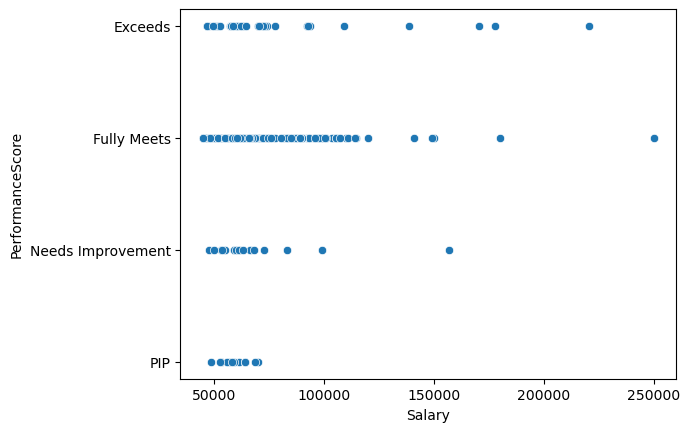

In [100]:
# scatterplot of performance score by salary to assess whether the company's salary structure aligns with performance outcomes 
sns.scatterplot(x='Salary', y='PerformanceScore', data=df)

Most of the data points are concentrated within a particular salary range for each performance category. It looks like most employees, regardless of performance score, fall within a similar salary band, with fewer individuals at the very high end of the salary range

For outliers, there are some data points that are far away from the main clusters, especially in the "Exceeds" and "Fully Meets" categories. These are probably high-earning individuals whose salary is significantly higher than their peers

Employees in the "Exceeds" category seem to have a wide range of salaries, suggesting that high performance may not always correlate with the highest salaries. There are also individuals in the "Fully Meets" category with salaries that range into the upper salary levels of the dataset

This scatter plot is particularly useful as a first glance for HR and management to assess whether the company's salary structure aligns with performance outcomes and to identify any inconsistencies or areas for review in compensation policies!!

<Axes: xlabel='MaritalDesc', ylabel='count'>

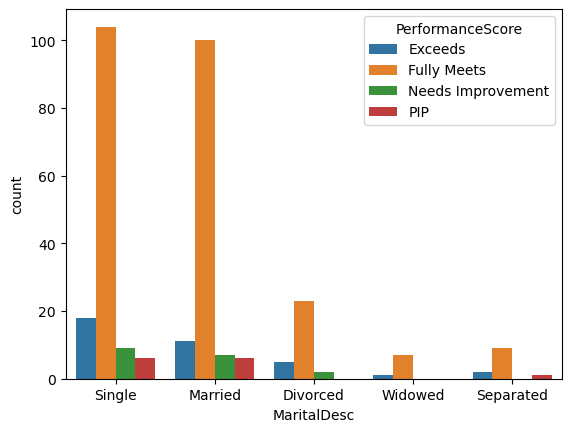

In [101]:
# seeing marital status against performance can help inform HR policies potentially
sns.countplot(df, x='MaritalDesc' ,hue='PerformanceScore')

Married employees have the highest counts across all performance scores, followed by single employees. This may indicate that married and single employees make up the majority of the workforce or that these groups tend to have higher performance scores

The majority of employees, regardless of their marital status, seem to fall into the 'Fully Meets' performance score category. Very few employees fall into the 'Needs Improvement' and 'PIP' categories, suggesting that most employees are meeting or exceeding performance expectations

This visualization can be useful for HR to see if there are any patterns or trends in performance relative to marital status, which may have implications for workplace support, resources allocation, or understanding the demographics of the workforce!

<Axes: xlabel='RecruitmentSource', ylabel='count'>

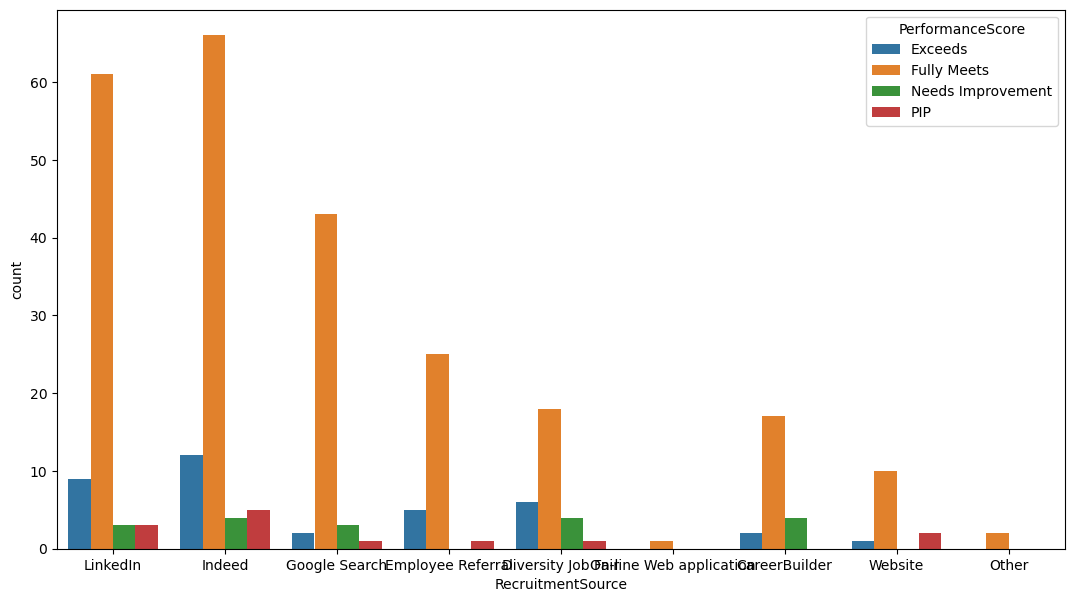

In [102]:
# to see what recruitment channels are more effective!

import matplotlib.pyplot as plt
dims = (13, 7)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)

sns.countplot(df,ax=ax, x='RecruitmentSource' ,hue='PerformanceScore')

Indeed and LinkedIn seem to be the most effective sources for recruitment, as they have the highest count of employees who 'Fully Meets' performance scores

While 'Diversity Job Fair' has a lower total count compared to LinkedIn and Indeed, it seems to bring in employees who mostly 'Fully Meet' their performance expectations, indicating quality hires

This visual helps inform future recruitment strategies and budget allocation!

In [103]:
# this will help me see basic statistics on certain averages, minimums, maximums so I can get a few key takeaways about the company as a whole
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,DOB,DateofHire,ManagerID,EngagementSurvey,EmpSatisfaction,LastPerformanceReview_Date,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311,311,311.0,311.000000,311.000000,311,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,1979-02-06 09:48:02.315112544,2013-02-03 22:50:32.797427712,15.199357,4.110000,3.890675,2017-09-10 21:17:56.527331072,10.237942
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1951-01-02 00:00:00,2006-01-09 00:00:00,1.0,1.120000,1.000000,2010-07-14 00:00:00,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1973-12-03 00:00:00,2011-07-11 00:00:00,10.0,3.690000,3.000000,2016-03-19 12:00:00,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,1980-09-30 00:00:00,2013-02-18 00:00:00,16.0,4.280000,4.000000,2019-01-16 00:00:00,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,1986-05-29 12:00:00,2014-09-23 12:00:00,19.5,4.700000,5.000000,2019-02-04 00:00:00,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,1992-08-17 00:00:00,2018-07-09 00:00:00,39.0,5.000000,5.000000,2019-02-28 00:00:00,20.000000
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,NaN,NaN,8.864507,0.789938,0.909241,NaN,5.852596


Some key takeaways:

Gender: About 43% of the employees are identified as 1 (representing male), suggesting there's a fairly even gender distribution

Engagement Survey: Survey scores are high (mean of 4.11 out of 5), indicating generally positive employee engagement 

Employee Satisfaction: The mean employee satisfaction is high at around 3.89 out of 5

Absences: On average employees have been absent about 10 times, with a range from 1 to 20 times

#### Data Dictionary

| Feature                     | Description                                                               | DataType |
|-----------------------------|---------------------------------------------------------------------------|----------|
| Employee Name               | Employee’s full name                                                      | Object   |
| EmpID                       | Employee ID is unique to each employee                                    | Integer  |
| MarriedID                   | Is the person married (1 or 0 for yes or no)                              | Integer  |
| MaritalStatusID             | Marital status code that matches the text field MaritalDesc               | Integer  |
| GenderID                    | Gender status code that matches the text field Sex                        | Integer  |
| EmpStatusID                 | Employment status code that matches text field EmploymentStatus           | Integer  |
| DeptID                      | Department ID code that matches the department the employee works in      | Integer  |
| PerfScoreID                 | Performance Score code that matches the employee’s most recent performance score | Integer  |
| FromDiversityJobFairID      | Was the employee sourced from the Diversity job fair? 1 or 0 for yes or no | Binary   |
| Salary                      | The person’s yearly salary. $ U.S. Dollars                                | Integer    |
| Termd                       | Has this employee been terminated - 1 or 0                                | Binary   |
| PositionID                  | An integer indicating the person’s position                               | Integer  |
| Position                    | The text name/title of the position the person has                        | Object     |
| DOB                         | Date of Birth for the employee                                            | Date     |
| Sex                         | Sex - M or F                                                              | Object    |
| MaritalDesc                 | The marital status of the person (divorced, single, widowed, separated, etc) | Object     |
| HispanicLatino              | Yes or No field for whether the employee is Hispanic/Latino               | Boolean    |
| RaceDesc                    | Description/text of the race the person identifies with                   | Object    |
| DateofHire                  | Date the person was hired                                                 | Date     |
| DateofTermination           | Date the person was terminated, only populated if, in fact, Termd = 1     | Date     |
| TermReason                  | A text reason / description for why the person was terminated             | Object     |
| EmploymentStatus            | A description/category of the person’s employment status. Anyone currently working full time = Active | Object     |
| Department                  | Name of the department that the person works in                           | Object     |
| ManagerName                 | The name of the person’s immediate manager                                | Object    |
| ManagerID                   | A unique identifier for each manager.                                     | Integer  |
| RecruitmentSource           | The name of the recruitment source where the employee was recruited from  | Object     |
| PerformanceScore            | Performance Score text/category (Fully Meets, Partially Meets, PIP, Exceeds) | Object     |
| EngagementSurvey            | Results from the last engagement survey, managed by an external partner  | Integer    |
| EmpSatisfaction             | A basic satisfaction score between 1 and 5, as reported on a recent employee satisfaction survey | Integer  |
| LastPerformanceReviewDate   | The most recent date of the person’s last performance review.              | Date     |
| Absences                    | The number of times the employee was absent from work.                    | Integer  |


#### List of UI components that I could include in my dashboard. Consider what would be most useful or interesting for users.

1. Dropdowns for selecting departments or employee groups
2. Sliders for selecting salary ranges or performance scores
3. Date pickers for filtering by join date or performance review dates
4. Search Bar for quick lookup of specific employees by name, ID, or other attributes

#### List of 3 possible data visualizations 

1. Performance vs. Salary Scatter Plot: Interactive scatter plot displaying relationship between employees' salaries and their performance scores. Filters/dropdowns could allow users to view data by department, gender, or age group

2. Retention Rate Over Time: A line graph or area chart that tracks employee retention over time. Could include a dropdown to filter by department or manager, revealing how retention rates vary across different parts of the organization

3. Survey Scores vs. Satisfaction Levels: A bubble chart where each bubble represents a department or team, sized by number of employees and colored by average employee satisfaction, plotted against average engagement survey scores


In [105]:
# export it to a csv file to upload to github, name it 'data'
df.to_csv('C:/Users/Student/Downloads/data.csv', index=False)